In [1]:
import cv2
import matplotlib.pyplot as plt

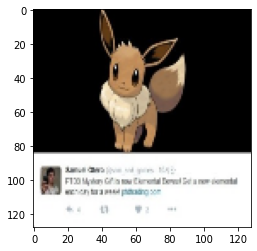

In [84]:
img = cv2.imread('evee (286).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
plt.imshow(img);

### 블러
- 가우시안
- NLmeans

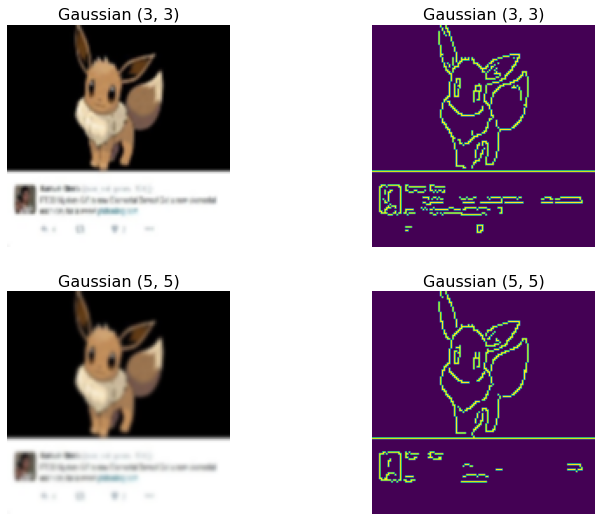

In [85]:
#### 가우시안
plt.figure(figsize = (12, 9))

plt.subplot(2, 2, 1)
blur = cv2.GaussianBlur(img, ksize = (3, 3), sigmaX = 0)
plt.axis('off'), plt.imshow(blur); plt.title('Gaussian (3, 3)', fontsize = 16)

plt.subplot(2, 2, 2)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
plt.axis('off'), plt.imshow(edged); plt.title('Gaussian (3, 3)', fontsize = 16)

plt.subplot(2, 2, 3)
blur = cv2.GaussianBlur(img, ksize = (5, 5), sigmaX = 0)
plt.axis('off'), plt.imshow(blur); plt.title('Gaussian (5, 5)', fontsize = 16)

plt.subplot(2, 2, 4)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기
plt.axis('off'), plt.imshow(edged); plt.title('Gaussian (5, 5)', fontsize = 16);

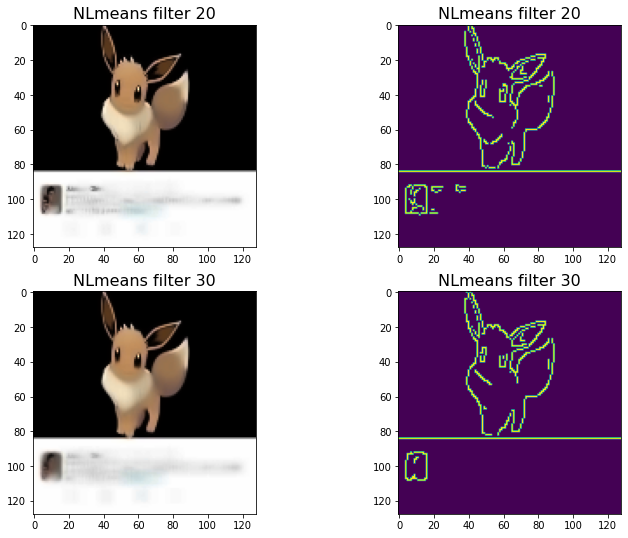

In [86]:
#### NLmeans
plt.figure(figsize = (12, 9))

plt.subplot(2, 2, 1)
img_1 = cv2.fastNlMeansDenoisingColored(img, None, 20, 15, 5, 9)
plt.imshow(img_1); plt.title('NLmeans filter 20', fontsize = 16)

plt.subplot(2, 2, 2)
edged_1 = cv2.Canny(img_1, 200, 255)
plt.imshow(edged_1); plt.title('NLmeans filter 20', fontsize = 16)

plt.subplot(2, 2, 3)
img_2 = cv2.fastNlMeansDenoisingColored(img, None, 30, 15, 5, 9)
plt.imshow(img_2); plt.title('NLmeans filter 30', fontsize = 16)

plt.subplot(2, 2, 4)
edged_2 = cv2.Canny(img_2, 200, 255)
plt.imshow(edged_2); plt.title('NLmeans filter 30', fontsize = 16);

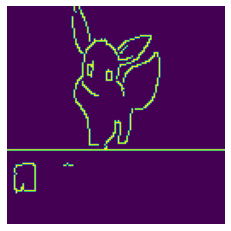

In [87]:
# 가우시안 + NLmeans 노이즈 제거 20
blur_1 = cv2.GaussianBlur(img_1, ksize = (5, 5), sigmaX = 0)
edged_1 = cv2.Canny(blur_1, 200, 255)       # 경계선 따기
plt.axis('off'), plt.imshow(edged_1);

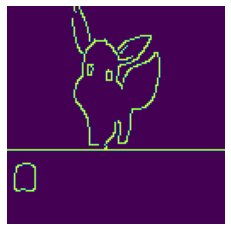

In [88]:
# 가우시안 + NLmeans 노이즈 제거 30
blur_2 = cv2.GaussianBlur(img_2, ksize = (5, 5), sigmaX = 0)
edged_2 = cv2.Canny(blur_2, 200, 255)       # 경계선 따기
plt.axis('off'), plt.imshow(edged_2);

### 구조화 요소 비교

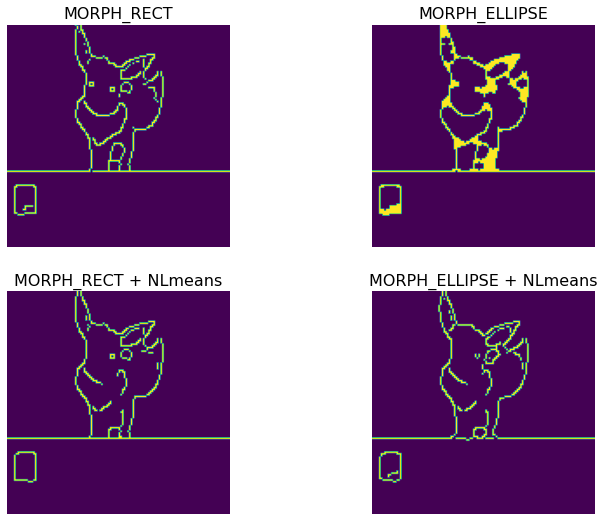

In [89]:
# getStructuringElement  : 커널역할의 구조요소 생성
#    MORPH_RECT          : 커널의 모양이 직사각형

# morphologyEx           : 노이즈 제거
#    MORPH_CLOSE         : closing 연산 진행(이미지를 깨끗하게 만듦)

plt.figure(figsize = (12, 9))

plt.subplot(2, 2, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 
edged = cv2.Canny(closed, 200, 255)       # 경계선 따기
plt.axis('off'), plt.title('MORPH_RECT', fontsize = 16), plt.imshow(edged);

plt.subplot(2, 2, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
plt.axis('off'), plt.title('MORPH_ELLIPSE', fontsize = 16), plt.imshow(closed);

plt.subplot(2, 2, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255)
plt.axis('off'), plt.title('MORPH_RECT + NLmeans', fontsize = 16), plt.imshow(edge_1);

plt.subplot(2, 2, 4)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255)
plt.axis('off'), plt.title('MORPH_ELLIPSE + NLmeans', fontsize = 16), plt.imshow(edge_1);

### 구조화 요소 커널 크기 조정

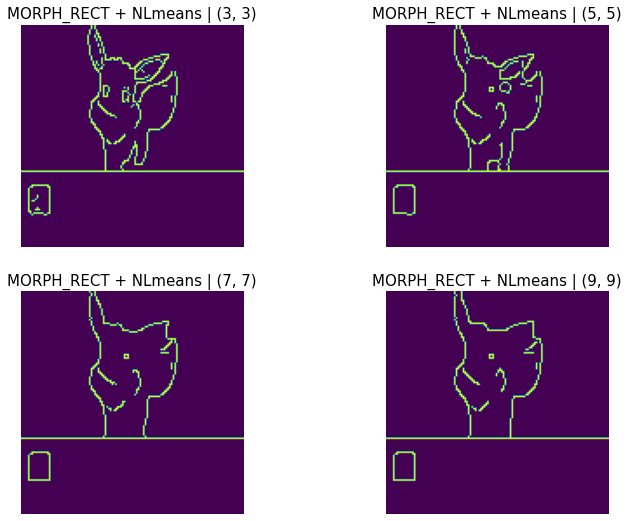

In [90]:
plt.figure(figsize = (12, 9))

plt.subplot(2, 2, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255)
plt.axis('off'), plt.title('MORPH_RECT + NLmeans | (3, 3)', fontsize = 15), plt.imshow(edge_1);

plt.subplot(2, 2, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255)
plt.axis('off'), plt.title('MORPH_RECT + NLmeans | (5, 5)', fontsize = 15), plt.imshow(edge_1);

plt.subplot(2, 2, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255)
plt.axis('off'), plt.title('MORPH_RECT + NLmeans | (7, 7)', fontsize = 15), plt.imshow(edge_1);

plt.subplot(2, 2, 4)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
closed_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel) 
edge_1 = cv2.Canny(closed_1, 200, 255) 
plt.axis('off'), plt.title('MORPH_RECT + NLmeans | (9, 9)', fontsize = 15), plt.imshow(edge_1) ;